

---
**ANN Implementation from scratch**


---





In [16]:
# Importing Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split                                    # importing module for splitting the dataset
from sklearn.preprocessing import StandardScaler                                        # Perform Feature Scaling - Standardizing the dataset

In [43]:
class ANN:
    def __init__(self,nx,ny,hidden_sizes):
        self.mx=nx
        self.my=ny
        self.nh=len(hidden_sizes)
        self.sizes=[self.mx]+hidden_sizes+[self.my]
        print(self.sizes)
        self.W={}
        self.B={}
        self.cost=[]
        for i in range(self.nh+1):
            self.W[i+1]=np.zeros((self.sizes[i],self.sizes[i+1]))
            self.B[i+1]=np.zeros((1,self.sizes[i+1]))
    def relu(self,x):
        return np.maximum(0,x)
    def gradient_relu(self,x):
        return np.where((x>0),1,0)
    def predict(self,X):
        y_pred=[]
        for x in X:
            self.forward_propagation(x)
            y_pred.append(self.H[self.nh+1]);
        return y_pred
    def get_loss(self,X,y):
        y_pred=self.predict(X)
        return np.mean((y_pred-y)**2)
    def plot(self):
        fig=plt.figure(figsize=(5,5))
        epochs_arr=np.arange(len(self.cost))
        plt.plot(epochs_arr,self.cost)
        plt.xlabel("Number of Epochs")
        plt.ylabel("RMS error")
        plt.title("RMS error vs Number of Iterations")   
    def forward_propagation(self,X):
        self.H={}
        self.H[0]=X.reshape(1,-1);
        for i in range(1,self.nh+2):
            self.H[i]=self.relu(np.matmul(self.H[i-1],self.W[i])+self.B[i])
    def back_propagation(self,y):
        self.dW={}
        self.dB={}
        self.dH={}
        self.dA={}
        L=self.nh+1
        self.dA[L]=self.H[L]-y
        for i in range(L,0,-1):
            self.dW[i]=np.matmul(self.H[i-1].T,self.dA[i])
            self.dB[i]=self.dA[i]
            self.dH[i-1]=np.matmul(self.dA[i],self.W[i].T)
            self.dA[i-1]=np.multiply(self.dH[i-1],self.gradient_relu(self.H[i-1]))
    def fit(self,X,Y,alpha=0.01,num_iters=500):
        for e in range(num_iters):
            dW = {}
            dB = {}
            m=X.shape[1]
            for i in range(self.nh+1):
                dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                dB[i+1] = np.zeros((1, self.sizes[i+1]))
            for x, y in zip(X, Y):
                self.forward_propagation(x)
                self.back_propagation(y)
                for i in range(self.nh+1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]
            for i in range(1,self.nh+2):
                self.W[i]-=alpha*(dW[i]/m)
                self.B[i]-=alpha*(dB[i]/m)
            self.cost.append(self.get_loss(X,y))
        

In [41]:
# Importing Dataset
data=pd.read_csv("boston.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


[13, 40, 20, 1]


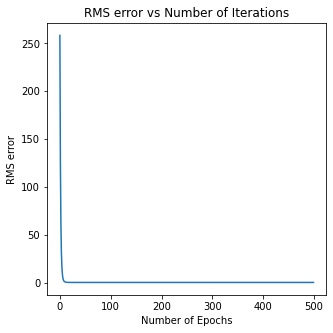

In [44]:
X=data.iloc[:,:-1].to_numpy()
sc=StandardScaler()
X=sc.fit_transform(X)
y=data.iloc[:,-1].to_numpy()
y=y.reshape((y.shape[0],1))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)      # splitting the dataset into training data and testing data



ann=ANN(X_train.shape[1],y_train.shape[1],[40,20])
ann.fit(X_train,y_train)
ann.plot()

In [45]:
# Importing Dataset
data=pd.read_csv("seeds_dataset.txt",delimiter="\t",header=None)
data

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


[7, 40, 20, 1]


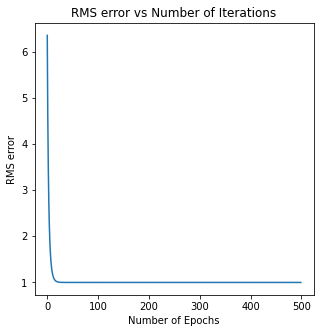

In [47]:
X=data.iloc[:,:-1].to_numpy()
sc=StandardScaler()
X=sc.fit_transform(X)
y=data.iloc[:,-1].to_numpy()
y=y.reshape((y.shape[0],1))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)      # splitting the dataset into training data and testing data



ann=ANN(X_train.shape[1],y_train.shape[1],[40,20])
ann.fit(X_train,y_train)
ann.plot()